In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

In [2]:
def load_dataset():
    data = pd.read_csv('vader_dataset.csv')
    return data

In [3]:
tweet_df = load_dataset()
df = pd.DataFrame(tweet_df)

In [4]:
df

,Unnamed: 0,timestamp,tweet,label,sentiment
0,0,2022-05-15 06:12:25+00:00,i-i haven t had the booster vaccine yet,0.0000,Negative
1,1,2022-05-19 09:35:16+00:00,aa already has the booster vaccine you can t s...,0.4939,Positive
2,2,2022-05-19 10:00:50+00:00,amen allahumma amen for the prayers for the fa...,0.7351,Positive
3,3,2022-03-03 06:31:44+00:00,amen tomorrow is a booster vaccine even though,0.0000,Negative
4,4,2022-03-03 09:22:40+00:00,amen go home take a break immediately sis when...,0.2500,Positive
...,...,...,...,...,...
4055,4055,2022-05-14 09:51:38+00:00,let s get vaccine booster ampoule url,0.0000,Negative
4056,4056,2022-03-03 03:00:35+00:00,let s vaccine booster url,0.0000,Negative
4057,4057,2021-11-25 06:57:09+00:00,yes yes yes yes kookmin jikook short au people...,0.9763,Positive
4058,4058,2022-03-03 06:57:02+00:00,yes you are free to choose any booster vaccine...,0.8519,Positive


In [5]:
df.drop(df.columns[[0,1]], axis=1, inplace=True)
df

,tweet,label,sentiment
0,i-i haven t had the booster vaccine yet,0.0000,Negative
1,aa already has the booster vaccine you can t s...,0.4939,Positive
2,amen allahumma amen for the prayers for the fa...,0.7351,Positive
3,amen tomorrow is a booster vaccine even though,0.0000,Negative
4,amen go home take a break immediately sis when...,0.2500,Positive
...,...,...,...
4055,let s get vaccine booster ampoule url,0.0000,Negative
4056,let s vaccine booster url,0.0000,Negative
4057,yes yes yes yes kookmin jikook short au people...,0.9763,Positive
4058,yes you are free to choose any booster vaccine...,0.8519,Positive


In [6]:
def label(x):
    if ( x == 'Positive'):
        return 1
    else:
        return 0
df.sentiment = df.sentiment.apply(label)

In [7]:
df

,tweet,label,sentiment
0,i-i haven t had the booster vaccine yet,0.0000,0
1,aa already has the booster vaccine you can t s...,0.4939,1
2,amen allahumma amen for the prayers for the fa...,0.7351,1
3,amen tomorrow is a booster vaccine even though,0.0000,0
4,amen go home take a break immediately sis when...,0.2500,1
...,...,...,...
4055,let s get vaccine booster ampoule url,0.0000,0
4056,let s vaccine booster url,0.0000,0
4057,yes yes yes yes kookmin jikook short au people...,0.9763,1
4058,yes you are free to choose any booster vaccine...,0.8519,1


In [8]:
df.drop(df.columns[[1]], axis=1, inplace=True)
df

,tweet,sentiment
0,i-i haven t had the booster vaccine yet,0
1,aa already has the booster vaccine you can t s...,1
2,amen allahumma amen for the prayers for the fa...,1
3,amen tomorrow is a booster vaccine even though,0
4,amen go home take a break immediately sis when...,1
...,...,...
4055,let s get vaccine booster ampoule url,0
4056,let s vaccine booster url,0
4057,yes yes yes yes kookmin jikook short au people...,1
4058,yes you are free to choose any booster vaccine...,1


In [9]:
print(df.shape)
print(df['sentiment'].value_counts(normalize=True))

(4060, 2)
0    0.562808
1    0.437192
Name: sentiment, dtype: float64


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df['tweet']
y = df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)



In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()


x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

X = tfidf.transform(X)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(X.shape)

(3654, 6367)
(406, 6367)
(4060, 6367)


              precision    recall  f1-score   support

           0       0.86      0.92      0.88       251
           1       0.85      0.75      0.79       155

    accuracy                           0.85       406
   macro avg       0.85      0.83      0.84       406
weighted avg       0.85      0.85      0.85       406

prediksi hasil data testing : 0.8522167487684729
[[230  21]
 [ 39 116]]


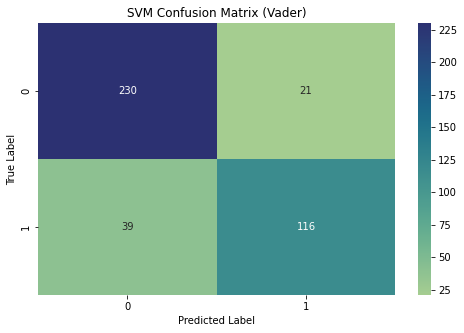

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC(kernel='linear', probability=True)
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))
print('prediksi hasil data testing :', svm.score(x_test, y_test))


from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax,cmap='crest')

plt.title('SVM Confusion Matrix (Vader)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusionmatrix-svm-vader.jpg', dpi=100)
plt.show()



In [14]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, cross_val_score



cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(svm, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

print(scores)
print(mean(scores), std(scores))


[0.80049261 0.85960591 0.85221675 0.84482759 0.8226601  0.86453202
 0.84975369 0.84975369 0.8546798  0.84236453]
0.844088669950739 0.018067807817825927


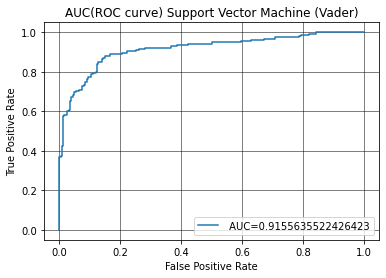

In [15]:
from sklearn.metrics import roc_curve

y_pred = svm.predict_proba(x_test)[::,1]
test_fpr, test_tpr, _ = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

plt.grid()

plt.plot(test_fpr, test_tpr, label=" AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve) Support Vector Machine (Vader)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.savefig('roc-svm-vader.jpg', dpi=100)
plt.show()

[[227  24]
 [ 44 111]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       251
           1       0.82      0.72      0.77       155

    accuracy                           0.83       406
   macro avg       0.83      0.81      0.82       406
weighted avg       0.83      0.83      0.83       406

prediksi hasil data testing : 0.8325123152709359
[0.77339901 0.81527094 0.80295567 0.83743842 0.80295567 0.83990148
 0.81773399 0.82019704 0.79802956 0.83990148]
0.8147783251231526 0.020215058648948948


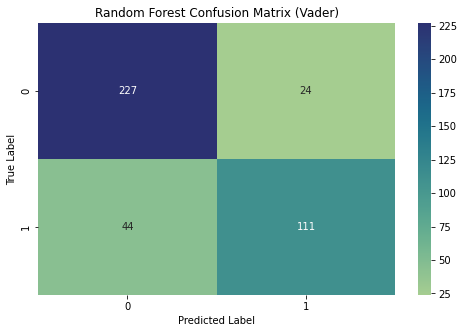

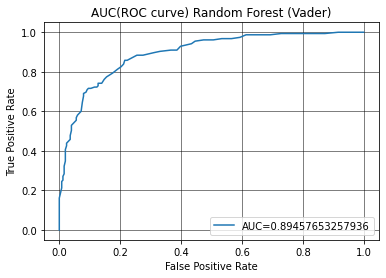

In [17]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rf= RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)

#BATAS 
matrix_rf = confusion_matrix(y_test, pred_rf)
print(matrix_rf)

print(classification_report(y_test, pred_rf))
print('prediksi hasil data testing :', rf.score(x_test, y_test))

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))


cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

print(scores)
print(mean(scores), std(scores))

# CONFUSSION MATRIX
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix_rf, annot=True, fmt=".0f", ax=ax,cmap='crest')

plt.title('Random Forest Confusion Matrix (Vader)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusionmatrixrf-vader.jpg', dpi=100)
plt.show()

# ROC CURVE
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.grid()
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("AUC(ROC curve) Random Forest (Vader)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.legend(loc=4)
plt.savefig('roc-rf-vader.jpg', dpi=100)
plt.show()